## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

1. Data Collection 
2. Data Anaylsis_ EDA And Pre-Processing
3. Features Engineering 
4. Visualization
5. Features Selection 
6. Hyper-Parameters Optimization
7. Build The Model

### Data Collection 

In [2]:
## Loading the dataset 
loan_data = pd.read_csv('loan_train.csv')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


#### Spliting the data into train and test to prevent any chance for data leakage


In [3]:
## Shuffling the data 

loan_data = loan_data.sample(len(loan_data) , random_state = 1).reset_index(drop = True)

In [4]:
loan_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,1,Graduate,No,1125000,0.0,19600000,360.0,NaN,Semiurban,N
1,Female,Yes,0,Not Graduate,No,301700,66300.0,10200000,360.0,NaN,Semiurban,Y
2,Male,No,0,Graduate,No,180000,121300.0,4700000,360.0,1.0,Urban,Y


In [5]:
## Spliting the data into train and test 
train_data = loan_data[:491]
test_data = loan_data[491:]

In [6]:
## print the shape of trian and test data
print(f" shape of train data is {train_data.shape} \n shape of test data is {test_data.shape}")

 shape of train data is (491, 12) 
 shape of test data is (123, 12)


#### Data Anaylsis And Pre- processing
_______________________________________
1. Missing Values 
2. Duplicated Values 
3. All Numerical Values
4. The Distribution Of Numerical Values 
5. Categorical Variables
6. cardinalty Of Categorical Variables
7. OutLiers
8. The Relationship Between Independent And Dependent Variables

#### Missing Values

In [7]:
## the number of features with nan value  ____> train data

features_with_nan = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
print(f"The Number of Features With Nan Values : {len(features_with_nan)}")
print("_________________________________________________________________________")
## the precentage of missing in each features 

for feature in features_with_nan :
    print(f'{feature} : {np.round(train_data[feature].isnull().mean(),4)} % Missing Values')

The Number of Features With Nan Values : 6
_________________________________________________________________________
Gender : 0.0244 % Missing Values
Married : 0.0061 % Missing Values
Dependents : 0.0265 % Missing Values
Self_Employed : 0.055 % Missing Values
Term : 0.0265 % Missing Values
Credit_History : 0.0754 % Missing Values


In [8]:
## Checking the balanced of data set 

loan_data['Status'].value_counts()

Status
Y    422
N    192
Name: count, dtype: int64

#### This Data Is Unbalanced 69% For Y (Majority) and 31% for N (Minority)

In [9]:
## the number of features with nan value  ____> test data

features_with_nan = [col for col in test_data.columns if test_data[col].isnull().sum()]
print(f"The Number of Features With Nan Values : {len(features_with_nan)}")
print("_________________________________________________________________________")
## the precentage of missing in each features 

for feature in features_with_nan :
    print(f'{feature} : {np.round(test_data[feature].isnull().mean(),3)} % Missing Values')

The Number of Features With Nan Values : 5
_________________________________________________________________________
Gender : 0.008 % Missing Values
Dependents : 0.016 % Missing Values
Self_Employed : 0.041 % Missing Values
Term : 0.008 % Missing Values
Credit_History : 0.106 % Missing Values


#### There Are 5 Features With Nan Values 

In [10]:
## Checking for Duplicated values 
print(f"The Number Of Duplicated Values In Train Data :- {train_data.duplicated().sum()}")

## Checking for Duplicated values 
print(f"The Number Of Duplicated Values In Test Data :- {test_data.duplicated().sum()}")


The Number Of Duplicated Values In Train Data :- 0
The Number Of Duplicated Values In Test Data :- 0


#### All Numerical Variables 

In [11]:
numerical_features = [col for col in train_data.columns if train_data[col].dtype != "O"]
print(f"The Precentage of Numerical Features in Dataset :- {np.round(len(numerical_features) / train_data.shape[1],2)} %")

The Precentage of Numerical Features in Dataset :- 0.42 %


#### There Are 2 types of Numerical Features 1.Discrete 2.Countinous

In [12]:
## Making list of Discrete_features
Discrete_features = [col for col in numerical_features if len(train_data[col].unique()) < 25 ]
Discrete_features

['Term', 'Credit_History']

In [13]:
## Making list of Continous Features 
continous_features = [col for col in numerical_features if col  not in Discrete_features ]
continous_features

['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']

#### The Distribution Of Numerical Features 

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


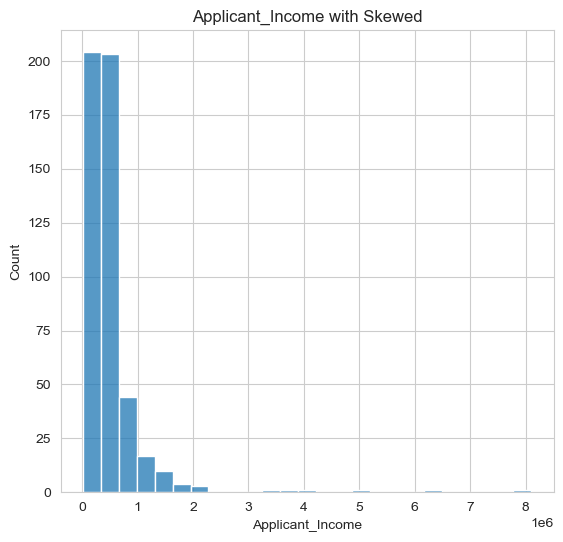

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


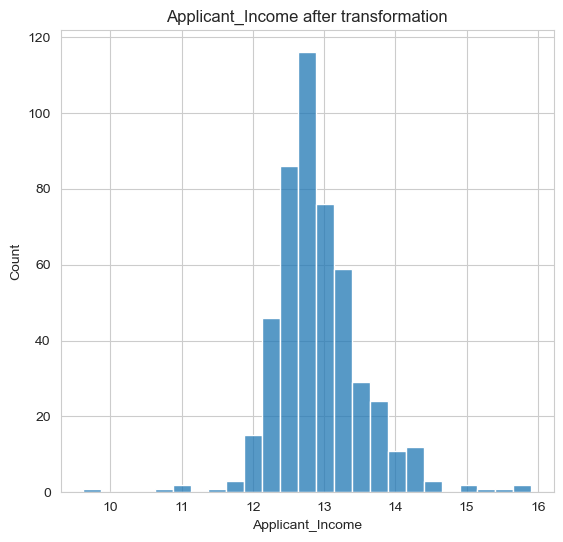

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


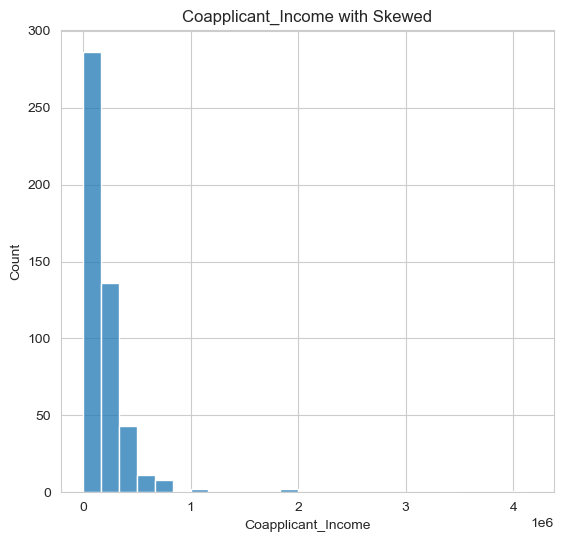

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)
C:\Users\Kimo Store\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


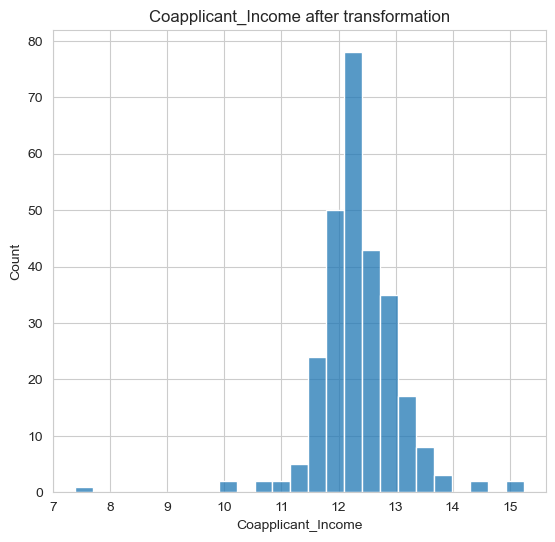

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


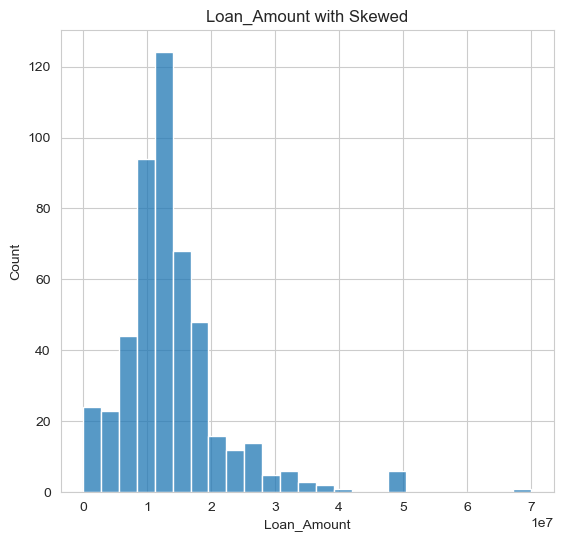

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2616316524.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)
C:\Users\Kimo Store\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


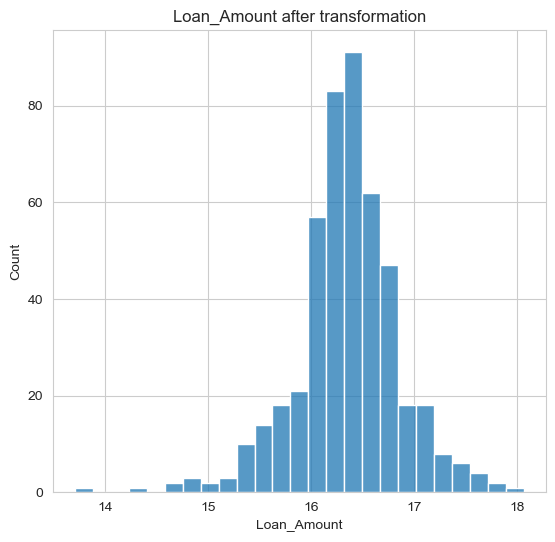

In [14]:
for feature in continous_features:
    plt.subplots(figsize = (14,6))
    plt.subplot(121)
    sns.histplot(train_data[feature] , bins = 25)
    plt.title(f'{feature} with Skewed')
    plt.show()
    plt.subplots(figsize = (14,6))
    plt.subplot(122)
    sns.histplot(np.log(train_data[feature]) , bins = 25)
    plt.title(f'{feature} after transformation')
    plt.show()
    

#### Clearly Skewed To The Right 

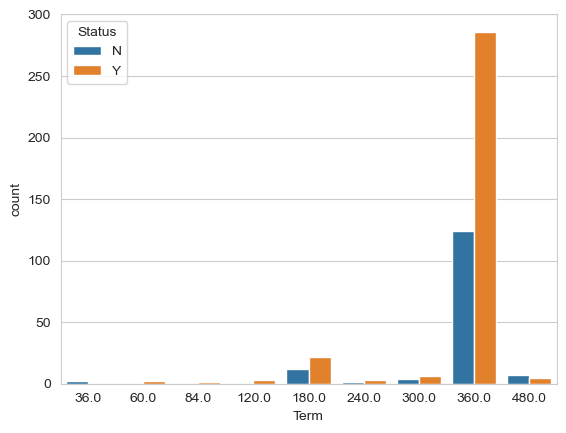

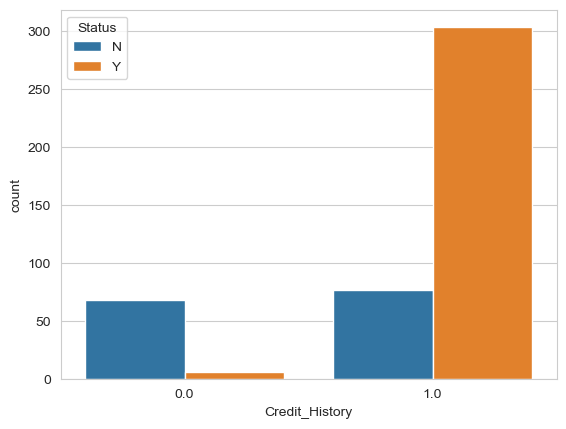

In [15]:
## Comparing the impact of Discrete on target
for col in Discrete_features:
    sns.countplot(x = train_data[col] , hue=train_data['Status'])
    plt.show()

#### Conclusion
1. The Most Of users who have Credit History Get Approved  its loan 
2. The Most Of users who Get Approved its Loan Based on 360 Day Term

#### All Caregorical Features

In [16]:
## making list of all categorical features 
categorical_features = [col for col in train_data if train_data[col].dtype == "O"]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Area',
 'Status']

In [17]:
## how many labels in each features 
for col in categorical_features:
    print(col , ":" , len(train_data[col].unique()) , 'Labels')

Gender : 3 Labels
Married : 3 Labels
Dependents : 5 Labels
Education : 2 Labels
Self_Employed : 3 Labels
Area : 3 Labels
Status : 2 Labels


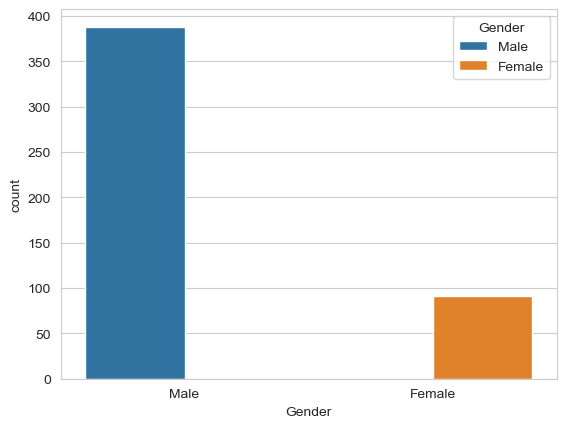

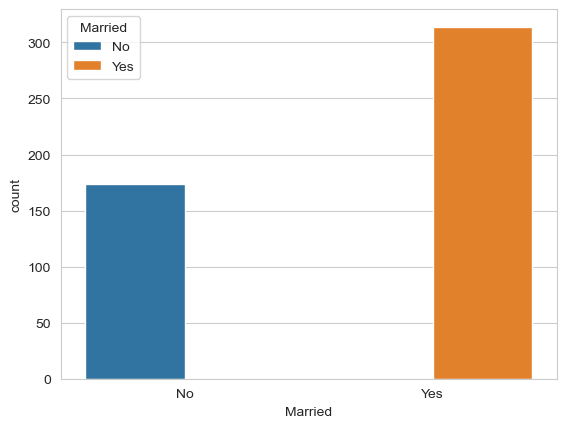

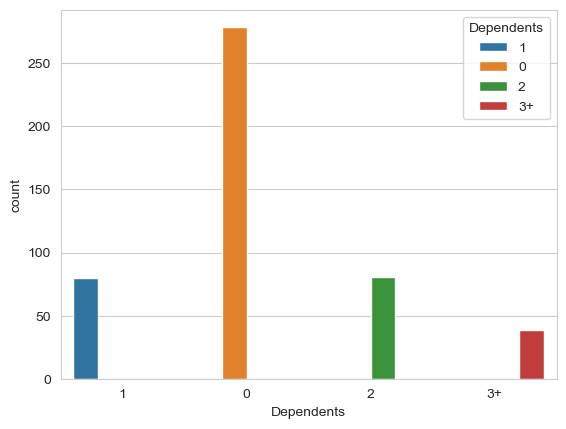

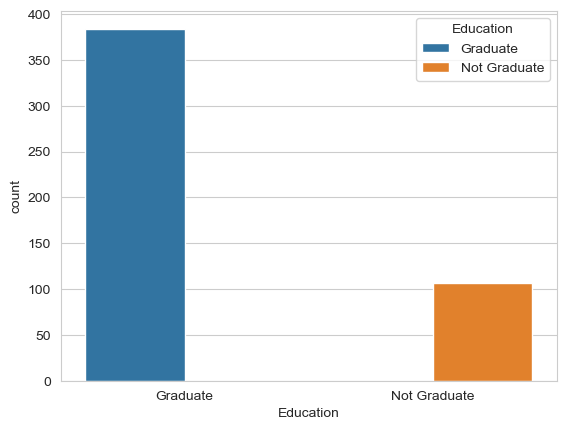

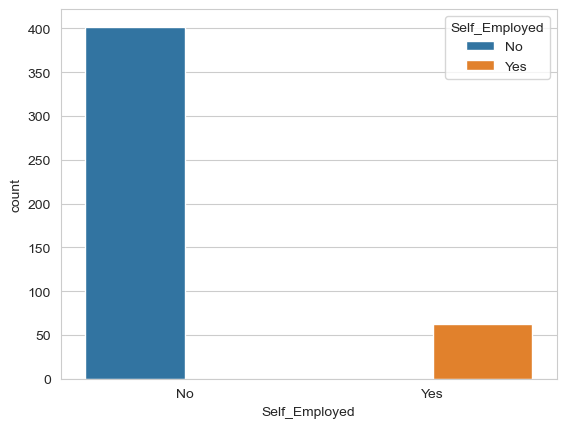

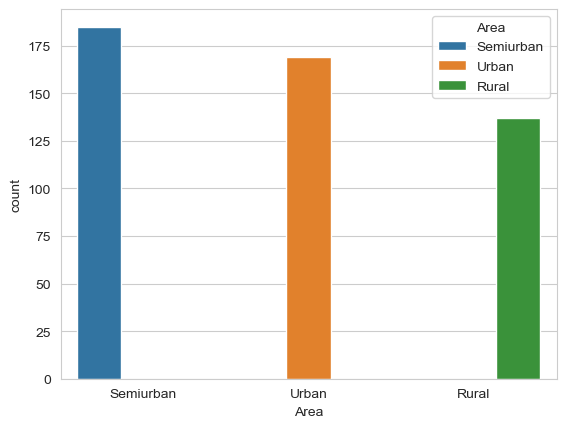

In [18]:
## The Impact Of labels in Categorical Features On Status
for col in categorical_features:
    if col != 'Status':
        sns.countplot(x = train_data[col] , hue=train_data[col])
        plt.show()

#### Conclusion
1. The Most of user are male the male has more chance to get approved The Loan 
2. Based on Married Features If the user is married that increase the precentage of approving
3. Education play important rule to get approved
4. Self_Employed The Most of user are Self_Employed 
5. Area does not play significent rule

#### Outliers

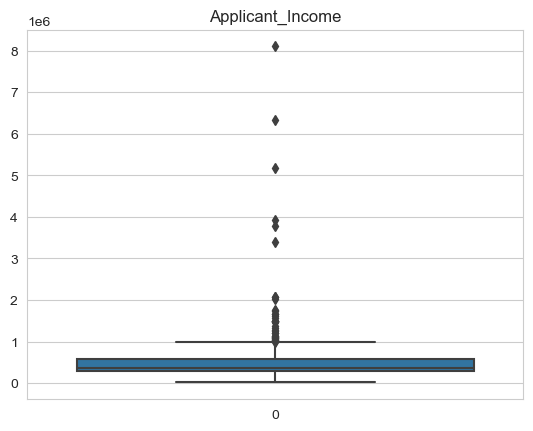

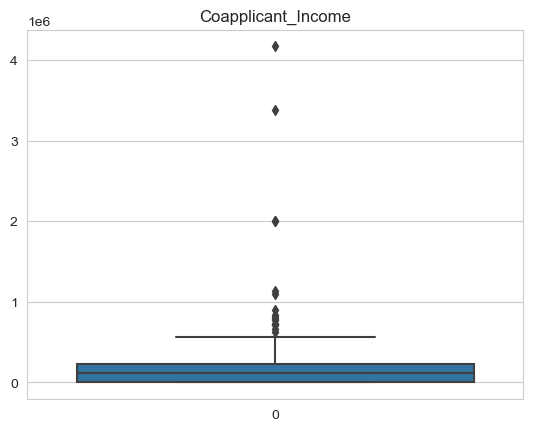

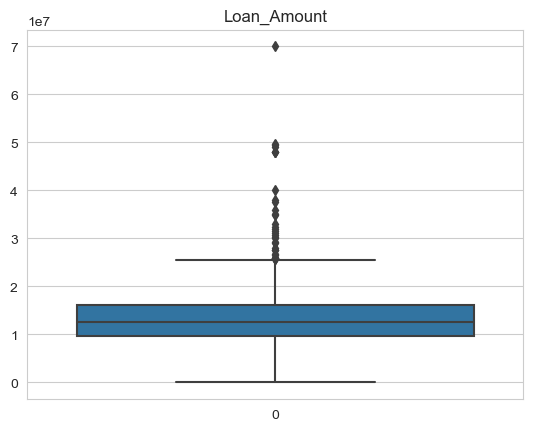

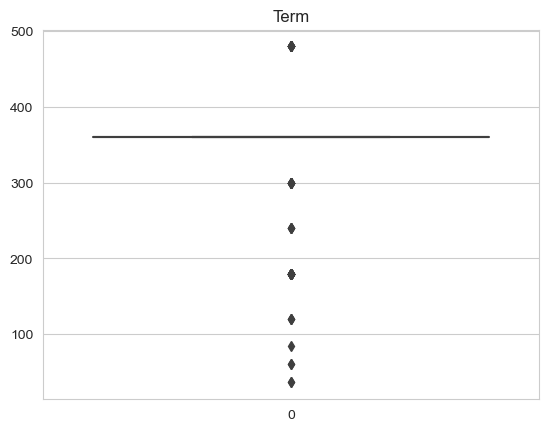

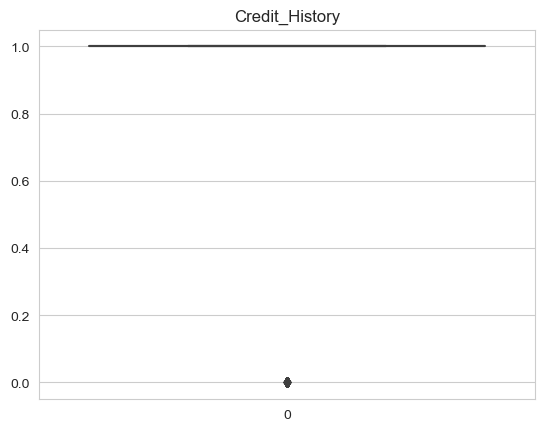

In [19]:
## Checkin for Outliers
for feature in numerical_features:
    sns.boxplot(train_data[feature])
    plt.title(feature)
    plt.show()

#### Conclusion
There Are too Many Outliers And if we Delete Outliers we will lose alot of observation to solve this we can use algorthim can
handle the outliers

## Features Engineering 

In [20]:
## Handling missing values in numerical features 
num_feat_with_nan = [col for col in train_data.columns if train_data[col].isnull().sum() and train_data[col].dtype != "O"]

In [21]:
## replacing missinf values with median because features have many outliers we cant depend on mean ---> train data 
for feature in num_feat_with_nan:
    
    train_data[feature] = train_data[feature].fillna(train_data[feature].median())

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\3017227448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = train_data[feature].fillna(train_data[feature].median())


In [22]:
## Handling missing values in numerical features -----> test data
num_feat_with_nan = [col for col in test_data.columns if test_data[col].isnull().sum() and test_data[col].dtype != "O"]

## replacing missinf values with median because features have many outliers we cant depend on mean 
for feature in num_feat_with_nan:
    
    test_data[feature] = test_data[feature].fillna(test_data[feature].median())

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\326771820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature] = test_data[feature].fillna(test_data[feature].median())


In [23]:
## handling missing values in categorical features by add new labels named  missing 
cat_feat_with_nan = [col for col in train_data.columns if train_data[col].isnull().sum() and train_data[col].dtype == "O"]
for feature in categorical_features:
    train_data[feature] = np.where(train_data[feature].isnull() ,'Missing' , train_data[feature])
    

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\860695179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = np.where(train_data[feature].isnull() ,'Missing' , train_data[feature])


In [24]:
## handling missing values in categorical features by add new labels named  missing ---> Test Data 
cat_feat_with_nan = [col for col in test_data.columns if test_data[col].isnull().sum() and test_data[col].dtype == "O"]
for feature in categorical_features:
    test_data[feature] = np.where(test_data[feature].isnull() ,'Missing' , test_data[feature])
    

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\587992800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature] = np.where(test_data[feature].isnull() ,'Missing' , test_data[feature])


In [25]:
## Checking for missing values after pre processing nan values 
print('missing values in train data\n',[col for col in train_data.columns if train_data[col].isnull().sum()])


print('missing values in test data\n',[col for col in test_data.columns if test_data[col].isnull().sum()])

missing values in train data
 []
missing values in test data
 []


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              491 non-null    object 
 1   Married             491 non-null    object 
 2   Dependents          491 non-null    object 
 3   Education           491 non-null    object 
 4   Self_Employed       491 non-null    object 
 5   Applicant_Income    491 non-null    int64  
 6   Coapplicant_Income  491 non-null    float64
 7   Loan_Amount         491 non-null    int64  
 8   Term                491 non-null    float64
 9   Credit_History      491 non-null    float64
 10  Area                491 non-null    object 
 11  Status              491 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 46.2+ KB


### In This Step we will Solve Imbalanced Data

In [27]:
X = train_data.drop(columns = 'Status')
y = train_data['Status']

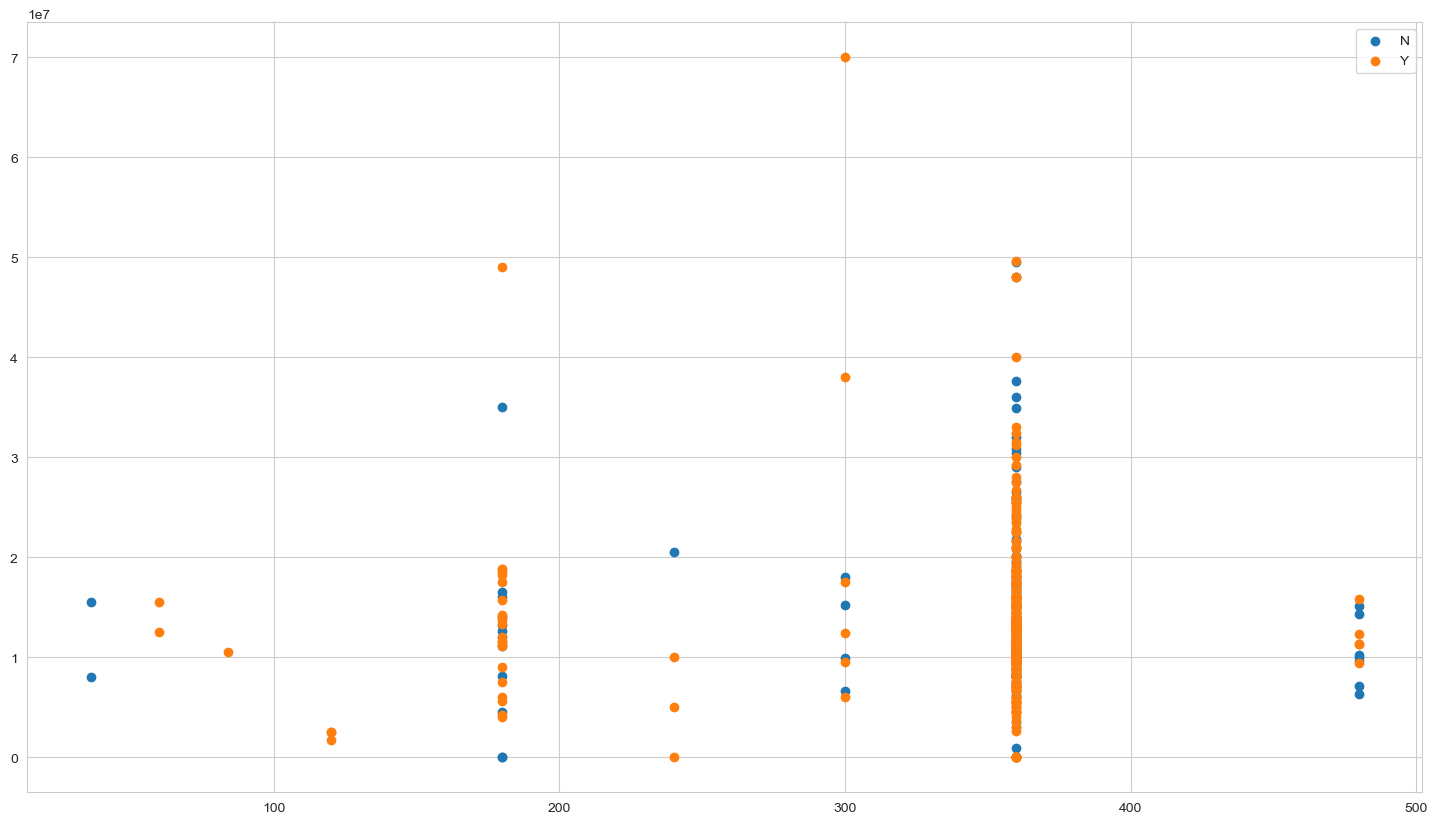

In [28]:
## Ploting the imbalanced observation
from collections import Counter

plt.figure(figsize=(18,10))
counter = Counter(y)
for label , _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.loc[row_ix , 'Term'] , X.loc[row_ix , 'Loan_Amount'], label=label)
plt.legend()
plt.show()


1. Label Encoding 
2. Imbalanced Data Technique

In [29]:
## Encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### For Stauts Features
1. Yes --> 1
2. No -->  0

In [30]:
test_data[categorical_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Area,Status
491,Male,Yes,0,Graduate,No,Urban,Y
492,Male,Yes,1,Not Graduate,No,Rural,Y
493,Male,Yes,0,Graduate,No,Semiurban,Y
494,Male,No,0,Graduate,Missing,Semiurban,Y
495,Male,Yes,0,Graduate,No,Rural,N


In [31]:
## encoding lables in traing data

train_data['Gender'] = train_data['Gender'].replace({'Male' : 0 , 'Female' : 1 , 'Missing' : 2})

train_data['Education'] = train_data['Education'].replace({'Not Graduate' : 0 , 'Graduate' : 1})

train_data['Dependents'] = train_data['Dependents'].replace({'Missing' : 4 , '3+':3})


train_data['Married'] = train_data['Married'].replace({'No' : 0 , 'Yes' : 1 , 'Missing' : 2})

train_data['Self_Employed'] = train_data['Self_Employed'].replace({'No' : 0 , 'Yes' : 1 , 'Missing' : 2})

train_data['Area'] = train_data['Area'].replace({'Semiurban' : 0 , 'Urban' : 1 , 'Rural' : 2})

train_data['Status'] = train_data['Status'].replace({'Y' : 1 , 'N' : 0})

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\889606686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gender'] = train_data['Gender'].replace({'Male' : 0 , 'Female' : 1 , 'Missing' : 2})
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\889606686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Education'] = train_data['Education'].replace({'Not Graduate' : 0 , 'Graduate' : 1})
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\889606686.py:7: SettingWithCopyW

In [32]:
## encoding lables in test data

test_data['Gender'] = test_data['Gender'].replace({'Male' : 0 , 'Female' : 1 , 'Missing' : 2})

test_data['Dependents'] = test_data['Dependents'].replace({'Missing' : 4 , '3+':3})

test_data['Education'] = test_data['Education'].replace({'Not Graduate' : 0 , 'Graduate' : 1})


test_data['Married'] = test_data['Married'].replace({'No' : 0 , 'Yes' : 1 , 'Missing' : 2})

test_data['Self_Employed'] = test_data['Self_Employed'].replace({'No' : 0 , 'Yes' : 1 , 'Missing' : 2})

test_data['Area'] = test_data['Area'].replace({'Semiurban' : 0 , 'Urban' : 1 , 'Rural' : 2})

test_data['Status'] = test_data['Status'].replace({'Y' : 1 , 'N' : 0})

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2087243692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Gender'] = test_data['Gender'].replace({'Male' : 0 , 'Female' : 1 , 'Missing' : 2})
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2087243692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Dependents'] = test_data['Dependents'].replace({'Missing' : 4 , '3+':3})
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2087243692.py:7: SettingWithCopyWarning: 
A v

In [33]:
## convert the type of Dependents into int 
train_data['Dependents'] = train_data['Dependents'].astype(int)

test_data['Dependents'] = test_data['Dependents'].astype(int)

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2680480667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Dependents'] = train_data['Dependents'].astype(int)
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_7152\2680480667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Dependents'] = test_data['Dependents'].astype(int)


In [34]:
## Spliting The data into features and target
X_train = train_data.drop(columns = 'Status')
y_train = train_data['Status']

X_test = test_data.drop(columns = 'Status')
y_test = test_data['Status']

In [35]:
## increase the number of minority labels using Adasyn 
from imblearn.over_sampling import ADASYN , SMOTE , BorderlineSMOTE , RandomOverSampler 
ada = ADASYN()

somt = SMOTE()

border = BorderlineSMOTE()

over_samp = RandomOverSampler()

In [36]:
## Train Data
X_train_ada , y_train_ada = ada.fit_resample(X_train , y_train)

## test Data
X_test_ada , y_test_ada = ada.fit_resample(X_test , y_test)

In [37]:
print('y_train' ,Counter(y_train))

print('y_train_ada' ,Counter(y_train_ada))

print("_________________________________________________________")

print('y_test' ,Counter(y_test))

print('y_test_ada' ,Counter(y_test_ada))

y_train Counter({1: 336, 0: 155})
y_train_ada Counter({1: 336, 0: 323})
_________________________________________________________
y_test Counter({1: 86, 0: 37})
y_test_ada Counter({0: 91, 1: 86})


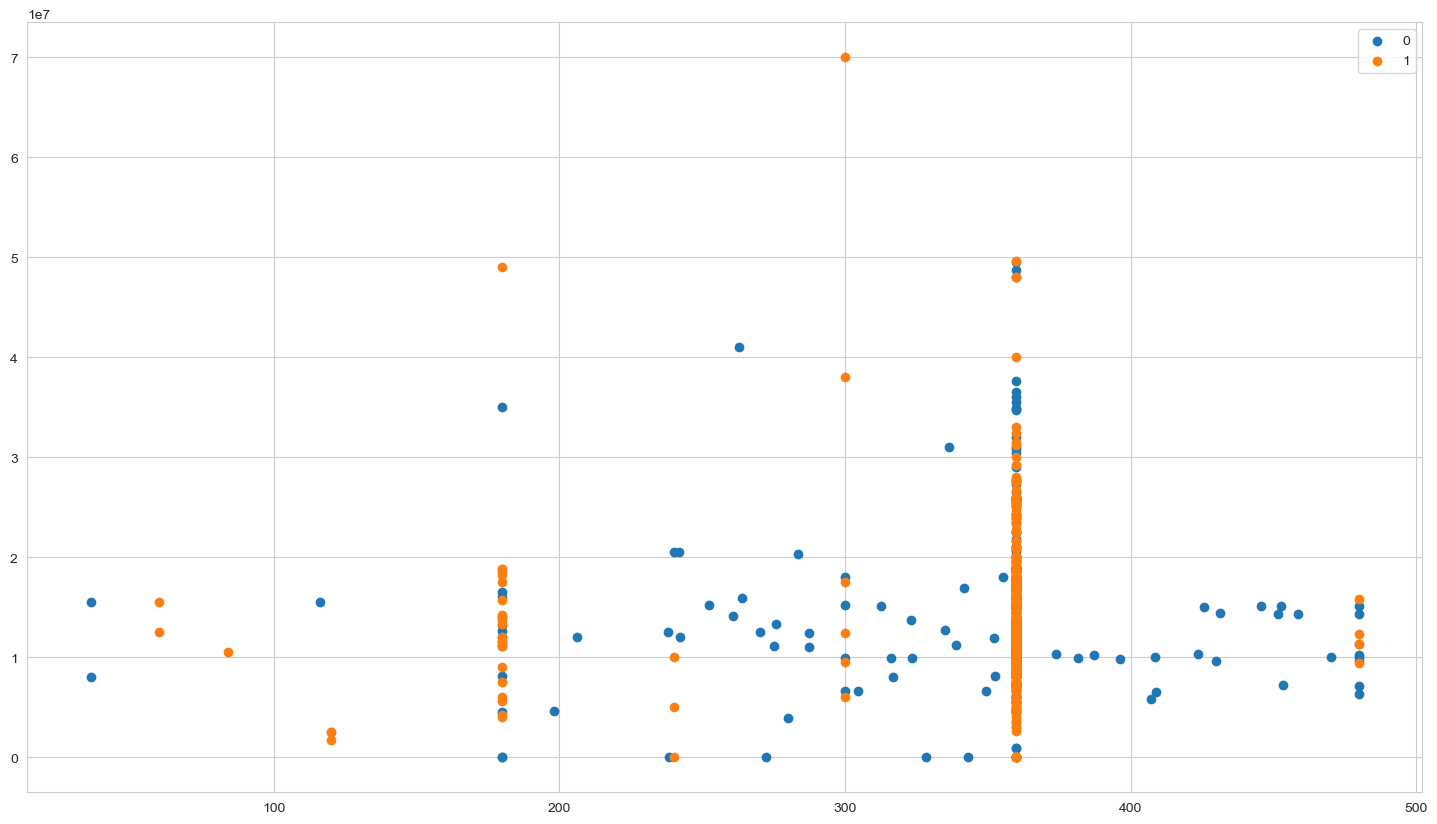

In [38]:
## Ploting the imbalanced observation

plt.figure(figsize=(18,10))
counter = Counter(y_train_ada)
for label , _ in counter.items():
    row_ix = np.where(y_train_ada == label)[0]
    plt.scatter(X_train_ada.loc[row_ix , 'Term'] , X_train_ada.loc[row_ix , 'Loan_Amount'], label=label)
plt.legend()
plt.show()


## Build The Model

In [39]:
from sklearn.metrics import recall_score , precision_score , f1_score , accuracy_score ,confusion_matrix
from sklearn.metrics import roc_auc_score ,roc_curve
from tpot import TPOTClassifier
from sklearn.ensemble import RandomForestClassifier


C:\Users\Kimo Store\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [40]:
RandomForestClassifier()

RandomForestClassifier()

In [41]:
## we try to ptimize the score on data we increased by adasyn

## Number of tress
n_estimators = [int(x) for x in np.linspace(300 , 1000 , 10)]

## max_depth --> to control the level of growing how deep grows the tree
max_depth = [int(x) for x in np.linspace(3,11,2)]

## min_samples_split to provide thershold based on it spliting will occure
min_samples_split = [1,3,5,7,9]

## min_samples_leaf to provide numbers of smaples based on it leaf will form 
min_samples_leaf = [1,2,4,6]

## max_features to provide number of features to prevent overfitting 
max_features = ['auto' , 'sqrt','log2']

## ccp_alpha to prevent over fitting and prun nodes from tree
ccp_alpha = [0.001,0.002,0.01,0.2,0.3,]

## criterion
criterion = ["gini", "entropy"]

## class_weight

class_weight = ['balanced', 'balanced_subsample']


param_adasyn = {
      'n_estimators' :n_estimators ,
       'max_depth' :max_depth ,
        'min_samples_split' :min_samples_split ,
       'min_samples_leaf':min_samples_leaf ,
       'max_features' :max_features,
    'ccp_alpha' : ccp_alpha,
    'criterion':criterion ,
    'class_weight' : class_weight
}


tpot_calss_adasyn = TPOTClassifier(generations=12 , population_size=24 , offspring_size=12 , verbosity=2 , 
                            config_dict={'sklearn.ensemble.RandomForestClassifier' : param_adasyn} , cv=5 , scoring = 'accuracy')

In [42]:
## using adasyn to increase minority 
tpot_calss_adasyn.fit(X_train_ada , y_train_ada)
pred = tpot_calss_adasyn.predict(X_test_ada)
print(f"Accuracy On Train Data : {tpot_calss_adasyn.score(X_train_ada , y_train_ada)}")
print(f"Accuracy On Test Data : {tpot_calss_adasyn.score(X_test_ada , y_test_ada)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test_ada , pred)}")
print(f"precision_score : {precision_score(y_test_ada , pred)}")
print(f"recall_score : {recall_score(y_test_ada , pred)}")
print(f"f1_score : {f1_score(y_test_ada , pred)}")


Optimization Progress:   0%|          | 0/168 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8074600971547536

Generation 2 - Current best internal CV score: 0.8120402498265094

Generation 3 - Current best internal CV score: 0.8120402498265094

Generation 4 - Current best internal CV score: 0.8120402498265094

Generation 5 - Current best internal CV score: 0.8180892898450149

Generation 6 - Current best internal CV score: 0.8180892898450149

Generation 7 - Current best internal CV score: 0.8180892898450149

Generation 8 - Current best internal CV score: 0.8180892898450149

Generation 9 - Current best internal CV score: 0.8180892898450149

Generation 10 - Current best internal CV score: 0.8180892898450149

Generation 11 - Current best internal CV score: 0.8180892898450149

Generation 12 - Current best internal CV score: 0.8180892898450149

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, ccp_alpha=0.001, class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1,

C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy On Train Data : 0.8437025796661608
Accuracy On Test Data : 0.7457627118644068
confusion_matrix 
: [[54 37]
 [ 8 78]]
precision_score : 0.6782608695652174
recall_score : 0.9069767441860465
f1_score : 0.7761194029850746


C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Accuracy on Data that we applied Adasyn technique to incease minority calss its accuracy is not good

In [45]:
## Data without adasyn technique 
from sklearn.ensemble import RandomForestClassifier
model_ran = RandomForestClassifier(ccp_alpha=0.1 , class_weight = 'balanced_subsample', max_depth=20 , n_estimators = 1000 , max_features=0.95 , min_samples_split=7)
model_ran.fit(X_train , y_train)

pred = model_ran.predict(X_test)
print(f"Accuracy On Train Data : {model_ran.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {model_ran.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")


Accuracy On Train Data : 0.8105906313645621
Accuracy On Test Data : 0.8048780487804879
confusion_matrix 
: [[14 23]
 [ 1 85]]
precision_score : 0.7870370370370371
recall_score : 0.9883720930232558
f1_score : 0.8762886597938144


### Accuracy On Data Without Adasyn Technique Is more beter than Data With adasyn Technique 

In [46]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(gamma = 3 , max_depth = 20)
model_xgb.fit(X_train_ada , y_train_ada)

pred = model_xgb.predict(X_test_ada)
print(f"Accuracy On Train Data : {model_xgb.score(X_train_ada , y_train_ada)}")
print(f"Accuracy On Test Data : {model_xgb.score(X_test_ada , y_test_ada)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test_ada , pred)}")
print(f"precision_score : {precision_score(y_test_ada , pred)}")
print(f"recall_score : {recall_score(y_test_ada , pred)}")
print(f"f1_score : {f1_score(y_test_ada , pred)}")

Accuracy On Train Data : 0.8679817905918058
Accuracy On Test Data : 0.7231638418079096
confusion_matrix 
: [[51 40]
 [ 9 77]]
precision_score : 0.6581196581196581
recall_score : 0.8953488372093024
f1_score : 0.7586206896551724


In [47]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(gamma =1.9, max_depth = 11)
model_xgb.fit(X_train , y_train)

pred = model_xgb.predict(X_test)
print(f"Accuracy On Train Data : {model_xgb.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {model_xgb.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")


Accuracy On Train Data : 0.8329938900203666
Accuracy On Test Data : 0.8048780487804879
confusion_matrix 
: [[14 23]
 [ 1 85]]
precision_score : 0.7870370370370371
recall_score : 0.9883720930232558
f1_score : 0.8762886597938144


In [48]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=500 ,learning_rate=0.01)
model_ada.fit(X_train , y_train)

pred = model_ada.predict(X_test)
print(f"Accuracy On Train Data : {model_ada.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {model_ada.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")


C:\Users\Kimo Store\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy On Train Data : 0.8126272912423625
Accuracy On Test Data : 0.8048780487804879
confusion_matrix 
: [[14 23]
 [ 1 85]]
precision_score : 0.7870370370370371
recall_score : 0.9883720930232558
f1_score : 0.8762886597938144


In [50]:
from lightgbm import LGBMClassifier
model_gbm = LGBMClassifier(learning_rate = 0.001 ,n_estimators = 500  , max_depth = 10 , num_leaves = 20)
model_gbm.fit(X_train , y_train)

pred = model_gbm.predict(X_test)
print(f"Accuracy On Train Data : {model_gbm.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {model_gbm.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")


[LightGBM] [Info] Number of positive: 336, number of negative: 155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684318 -> initscore=0.773686
[LightGBM] [Info] Start training from score 0.773686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Accuracy On Train Data : 0.8105906313645621
Accuracy On Test Data : 0.8048780487804879
confusion_matrix 
: [[14 23]
 [ 1 85]]
precision_score : 0.7870370370370371
recall_score : 0.9883720930232558
f1_score : 0.8762886597938144


In [51]:
print(f"roc_auc_score on train data {roc_auc_score(y_train,model_gbm.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score on test data {roc_auc_score(y_test,model_gbm.predict_proba(X_test)[:,1])}")


roc_auc_score on train data 0.907315668202765
roc_auc_score on test data 0.7232872407291012


In [52]:
pred = []
for model in [model_ada , model_gbm , model_xgb , model_ran]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_pred = pd.concat(pred , axis=1).mean(axis = 1)
print(f"roc_auc_score on train data {roc_auc_score(y_test,final_pred)}")


roc_auc_score on train data 0.7118164676304211


In [53]:
pd.concat(pred , axis = 1)

,0,1,2,3
0,0.573271,0.787300,0.886096,0.618736
1,0.565610,0.761416,0.796874,0.618736
2,0.567157,0.717325,0.769453,0.618736
3,0.558974,0.635134,0.590658,0.618736
4,0.564112,0.742367,0.789922,0.618736
...,...,...,...,...
118,0.564112,0.770245,0.789922,0.618736
119,0.565378,0.767956,0.857656,0.618736
120,0.567296,0.621788,0.566440,0.618736
121,0.564112,0.731533,0.770612,0.618736


In [54]:
## Calcilate the roc curve 
fpr , tpr , threshold = roc_curve(y_test , final_pred) 

In [55]:
threshold

array([       inf, 0.73193728, 0.72735861, 0.7265272 , 0.72523412,
       0.7236209 , 0.71005946, 0.71000704, 0.70243152, 0.69878998,
       0.69605578, 0.69603486, 0.69088536, 0.69056213, 0.68957171,
       0.6890783 , 0.68622859, 0.6857538 , 0.68005978, 0.67561677,
       0.67124807, 0.67121844, 0.66105429, 0.65849649, 0.65568481,
       0.65520336, 0.6511124 , 0.64776299, 0.64727148, 0.64646305,
       0.64253016, 0.64218503, 0.63623532, 0.63577525, 0.63034482,
       0.62865618, 0.62187867, 0.62066527, 0.61341592, 0.61186244,
       0.61039951, 0.60810008, 0.59144235, 0.278231  , 0.27757273,
       0.26670602, 0.26510287, 0.26003789])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_is = []
for thresh in threshold :
    y_pred = np.where(final_pred > thresh , 1 , 0)
    accuracy_is.append(accuracy_score(y_test , y_pred))
accuracy_is = pd.concat([pd.Series(threshold) , pd.Series(accuracy_is)] , axis = 1)
accuracy_is.columns = ['threshold' , 'accuracy_is']
accuracy_is.sort_values('accuracy_is' , ascending=False , inplace=True)

In [57]:
accuracy_is.head()

,threshold,accuracy_is
43,0.278231,0.804878
44,0.277573,0.796748
42,0.591442,0.796748
45,0.266706,0.756098
46,0.265103,0.747967


The Best Thershold is 0.2788 Give Accuracy 0.80 And Xgboost Its Accuracy is On Test Is 0.82 In This Step Hyper Parameters Optimizaion We try to find Out the best Accuracy and Hyper Parameters For Xgboost 

### Hyper-parameters Optimization
* Using T-Pot Method

In [58]:
## n_estimators ___> to detemine the number of trees
n_estimators = [int(x) for x in np.linspace(200 , 1000 , 10)]

## algorithm  
algorithm  = ['SAMME', 'SAMME.R']

## learning_rate 
learning_rate = [float(x) for x in np.arange(0.001 , 2 , 0.01)]


## making dic for this parameters 

param = { 'n_estimators':n_estimators ,
         
        'algorithm':algorithm ,
        'learning_rate': learning_rate }
        

In [59]:
tpot_calss = TPOTClassifier(generations=12 , population_size=24 , offspring_size=12 , verbosity=2 , 
                            config_dict={'sklearn.ensemble.AdaBoostClassifier' : param} , cv=5 , scoring = 'accuracy')

In [60]:
tpot_calss.fit(X_train , y_train)

Optimization Progress:   0%|          | 0/168 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.810616367759225

Generation 2 - Current best internal CV score: 0.810616367759225

Generation 3 - Current best internal CV score: 0.810616367759225

Generation 4 - Current best internal CV score: 0.810616367759225

Generation 5 - Current best internal CV score: 0.810616367759225

Generation 6 - Current best internal CV score: 0.810616367759225

Generation 7 - Current best internal CV score: 0.810616367759225

Generation 8 - Current best internal CV score: 0.810616367759225

Generation 9 - Current best internal CV score: 0.810616367759225

Generation 10 - Current best internal CV score: 0.810616367759225

Generation 11 - Current best internal CV score: 0.810616367759225

Generation 12 - Current best internal CV score: 0.810616367759225

Best pipeline: AdaBoostClassifier(CombineDFs(input_matrix, input_matrix), algorithm=SAMME, learning_rate=0.18099999999999997, n_estimators=377)


TPOTClassifier(config_dict={'sklearn.ensemble.AdaBoostClassifier': {'algorithm': ['SAMME',
                                                                                  'SAMME.R'],
                                                                    'learning_rate': [0.001,
                                                                                      0.011,
                                                                                      0.020999999999999998,
                                                                                      0.030999999999999996,
                                                                                      0.040999999999999995,
                                                                                      0.05099999999999999,
                                                                                      0.06099999999999999,
                                                                                      0.071,
                                                                                      0.08099999999999999,
                                                                                      0.09099999999999998,
                                                                                      0.10099999999999998,
                                                                                      0.11099999999999999,
                                                                                      0.12099999999999998,
                                                                                      0.13099999999...
                                                                                      0.19099999999999998,
                                                                                      0.20099999999999996,
                                                                                      0.21099999999999997,
                                                                                      0.22099999999999997,
                                                                                      0.23099999999999996,
                                                                                      0.24099999999999996,
                                                                                      0.25099999999999995,
                                                                                      0.26099999999999995,
                                                                                      0.27099999999999996,
                                                                                      0.28099999999999997,
                                                                                      0.291, ...],
                                                                    'n_estimators': [200,
                                                                                     288,
                                                                                     377,
                                                                                     466,
                                                                                     555,
                                                                                     644,
                                                                                     733,
                                                                                     822,
                                                                                     911,
                                                                                     1000]}},
               generations=12, offspring_size=12, population_size=24,
               scoring='accuracy', verbosity=2)

In [61]:
pred = tpot_calss.predict(X_test)
print(f"Accuracy On Train Data : {tpot_calss.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {tpot_calss.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")


Accuracy On Train Data : 0.8105906313645621
Accuracy On Test Data : 0.8048780487804879
confusion_matrix 
: [[14 23]
 [ 1 85]]
precision_score : 0.7870370370370371
recall_score : 0.9883720930232558
f1_score : 0.8762886597938144


In [63]:
def plot_roc_curve(fpr , tpr):
    plt.plot(fpr , tpr , color = 'orange' , label = 'ROC')
    plt.plot([0,1],[0,1] , color = 'blue' , linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

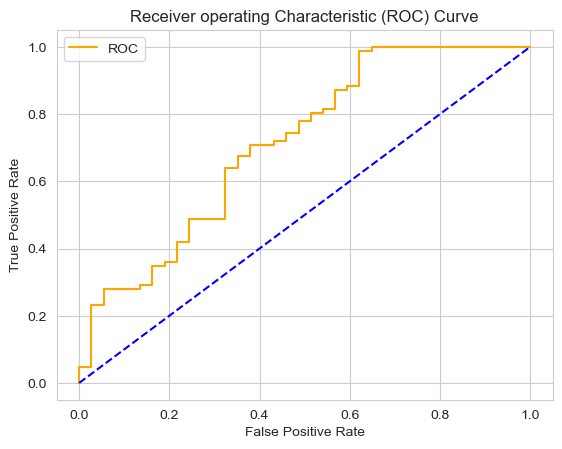

In [64]:
plot_roc_curve(fpr , tpr)

In [65]:
# making predictive systim :-
input_data =(0,1,0,1,0,303333,145900,9500000,360,1,1)

# changing inout_data to numpy array:-
input_data_as_numpy_array = np.asarray(input_data)

#reshape input_data as we predict one instance:-

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = tpot_calss.predict(input_data_reshaped)
print('prediction is:-', prediction)

if (prediction == 1):
    print('approved loan')
    
else:
    print('disapproved loan')

prediction is:- [1]
approved loan
